In [ ]:
!pip install tensorflow==1.14.0


     |████████████████████████████████| 109.2MB 98kB/s 
     |████████████████████████████████| 491kB 49.5MB/s 
     |████████████████████████████████| 3.2MB 53.3MB/s 
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
!pip install Keras==2.3.1

In [ ]:
import keras
keras.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

'2.3.1'

In [ ]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [ ]:
!pip install spellchecker

     |████████████████████████████████| 3.9MB 2.8MB/s 
  Created wheel for spellchecker: filename=spellchecker-0.4-cp36-none-any.whl size=3966516 sha256=93a9cc1f2f3ad2ab204804f373fd33885bb1a628bbdbaac9e66aeb88f7ae8caa
  Stored in directory: /root/.cache/pip/wheels/a2/e6/ad/28ab959cba7100f5c562a3d1711cd34b630734d241c4e1bd40
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-cp36-none-any.whl size=7113 sha256=6c4f50ffc0f558d5f9411cd485b21766a876c85182235282920bb643965d7330
  Stored in directory: /root/.cache/pip/wheels/58/e0/c1/e3fed0e9fd1a3708bc91870fb0ba30ef88527540006763674b
  Created wheel for soundex: filename=soundex-1.1.3-cp36-none-any.whl size=8862 sha256=6829344406212ebc9331a233410a7037fa48e729e4eb27fc131f5ae470096bf2
  Stored in directory: /root/.cache/pip/wheels/b5/bb/e6/9a4b6be56c40aa707509bddaf6d414187461ded9db7a25a41a
  Created wheel for silpa-common: filename=silpa_common-0.3-cp36-none-any.whl size=8453 sha256=8c75e6996ec6a922e9294add917d6185050f678c26ab64c93e

In [ ]:
!pip install pyspellchecker 

     |████████████████████████████████| 1.9MB 2.8MB/s 


In [ ]:
import pandas as pd
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import json
from keras.models import Sequential
from keras.layers import LSTM,Dense,Conv1D,MaxPooling1D,GlobalMaxPooling1D,SpatialDropout1D,Flatten,GRU, Embedding, Dropout, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Model




In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Toxic Comment Dataset/train.csv")

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
special_character_removal=re.compile(r'[^?!.,:a-z\d ]',re.IGNORECASE)
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"i'm" : "i am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
stop_words = set(stopwords.words('english')) # stopwords
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [ ]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
def clean_text(text):
  text = cont_to_exp(text)
  text = text.lower()
  text = BeautifulSoup(text,"lxml").text
  text = re.sub('[\d]','',text)
  text = REPLACE_BY_SPACE_RE.sub(' ',text)
  text = BAD_SYMBOLS_RE.sub(' ',text)
  text = ' '.join([word for word in text.split() if word not in set(stop_words)])
  
  return text

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: clean_text(x))

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://en.wikipedia.org/wiki/wikipedia_talk:no_original_research/archive15#youtube_art_as_primary_source" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://finance.yahoo.com/news/7-fascinating-nuggets-another-bewildering-150348488.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://en.wikipedia.org/wiki/wikipedia:elyes" looks like a URL. Beautiful Soup is not an HTTP client

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: lemmatize_words(x))

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits make username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really try edit war guy constantly rem...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannot make real suggestion improvement wonder...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,second time ask view completely contradict cov...,0,0,0,0,0,0
159567,ffea4adeee384e90,ashamed horrible thing put talk page,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm there actual article prostitution ...,0,0,0,0,0,0
159569,fff125370e4aaaf3,look like actually put speedy first version de...,0,0,0,0,0,0


In [ ]:
#data = data.apply(lambda x: correct_spellings(x))

In [ ]:
df.to_csv('/content/drive/My Drive/Toxic Comment Dataset/clean_toxic.csv')

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Toxic Comment Dataset/clean_toxic.csv')

In [ ]:
data = data.drop(['Unnamed: 0','id'],axis=1)

In [ ]:
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits make username hardcore metal...,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,hey man really try edit war guy constantly rem...,0,0,0,0,0,0
3,cannot make real suggestion improvement wonder...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum()

comment_text     68
toxic             0
severe_toxic      0
obscene           0
threat            0
insult            0
identity_hate     0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

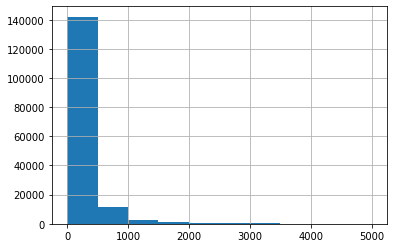

In [ ]:
data['comment_text'].str.len().hist()

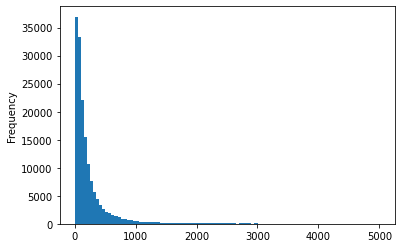

In [ ]:
data['len'] = data['comment_text'].apply(lambda s : len(s))
data['len'].plot.hist(bins=100)

In [ ]:
data.len.quantile(0.60) # 160 will be the max_length of sequence


161.0

In [ ]:
embed_size = 200 # how big is each word vector
max_features = 150000 # how many unique words to use (i.e num rows in embedding vector)
batch_size = 512 # how many samples to process at once
n_epochs = 20 # how many times to iterate over all samples
maxlen = 160 #  max_length of sequence


In [ ]:
data = data.drop(['len'],axis=1)

In [ ]:
data = data.loc[~((data['toxic'] == 0) & (data['severe_toxic'] == 0) & (data['obscene'] == 0) & (data['threat'] == 0)  & (data['insult'] == 0) & (data['identity_hate'] == 0))]

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data = data.drop(['index'],axis=1)

In [ ]:
data

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,cocksucker piss around work,1,1,1,0,1,0
1,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0
2,bye look come think comming back tosser,1,0,0,0,0,0
3,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1
4,fuck filthy mother as dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...
16218,previous conversation fuck shit eating liberal...,1,0,1,0,1,1
16219,mischievious pubic hair,1,0,0,0,1,0
16220,absurd edits absurd edit great white shark tot...,1,0,1,0,1,0
16221,hey listen ever delete edits ever annoy wwe k ...,1,0,0,0,1,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


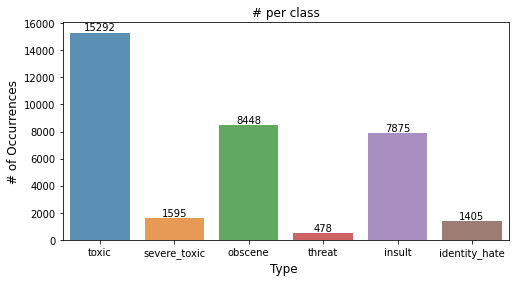

In [ ]:
x=data.iloc[:,1:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
color = sns.color_palette()


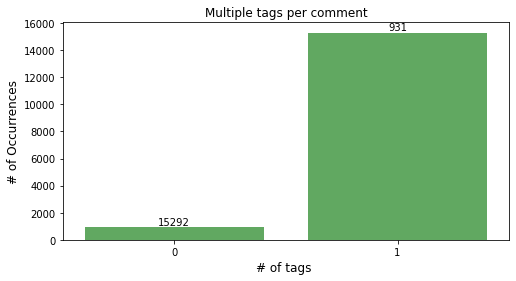

In [ ]:
x=data['toxic'].value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

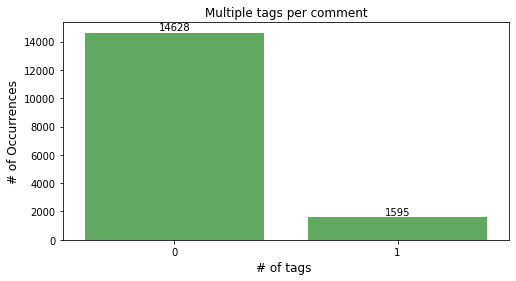

In [ ]:
x=data['severe_toxic'].value_counts()

#plot
plt.figure(figsize=(8,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[2])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

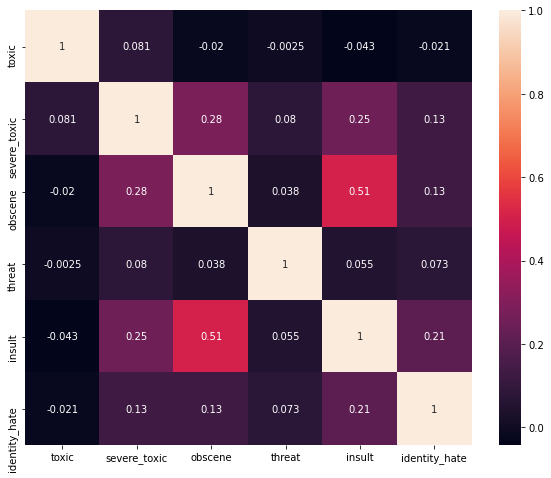

In [ ]:
temp_df=data.iloc[:,1:]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [ ]:
from wordcloud import WordCloud ,STOPWORDS


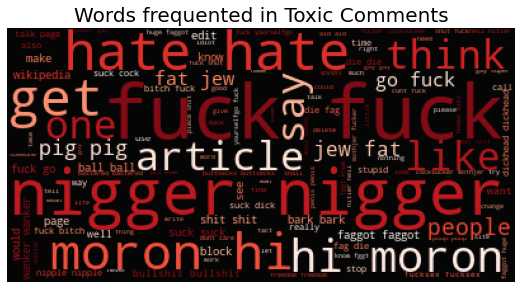

In [ ]:
subset=data[data.toxic==1]
text=subset.comment_text.values
wc= WordCloud(background_color="black",max_words=4000,stopwords=stop_words)
wc.generate(" ".join(text))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.axis("off")
plt.title("Words frequented in Toxic Comments", fontsize=20)
plt.imshow(wc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [ ]:
X = data['comment_text']
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
X = list(X)
y = data[classes].values

In [ ]:
# Tokenize text
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
train_X = tokenizer.texts_to_sequences(X)

# vocabulary
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

## Pad the sentences 
train_X = pad_sequences(train_X, maxlen=maxlen)

Vocabulary size: 29431


In [ ]:
import pickle
pickle.dump(tokenizer,open('toxic_tokenizer.pkl','wb'))

In [ ]:
print('Shape of data tensor:', train_X.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (16223, 160)
Shape of label tensor: (16223, 6)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_X, y, 
                                                    test_size=0.20)

In [ ]:
print('Number of entries in each comment:')
print('training: ', y_train.sum(axis=0))
print('test: ', y_test.sum(axis=0))

Number of entries in each comment:
training:  [12241  1296  6781   392  6322  1117]
test:  [3051  299 1667   86 1553  288]


In [ ]:
glove_vectors = dict()
# Creating Dictionary of Word and corresponding Vectors
file = open('/content/drive/My Drive/glove.6B.200d.txt',encoding='utf-8')

for line in file:
    values = line.split()
    word = values[0] # each word 
    vectors = np.asarray(values[1:],dtype='float32')
    glove_vectors[word] = vectors
file.close()

In [ ]:
embedding_matrix = np.random.random((len(word_index) + 1, embed_size))

In [ ]:
for word,index in word_index.items():
    if index >= max_features:
        continue
    embedding_vector = glove_vectors.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
    else:
        embedding_vector = glove_vectors.get(word.capitalize())
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
print('Completed creating embedding matrix')

Completed creating embedding matrix


In [ ]:
print("Shape of embedding matrix is {}".format(np.shape(embedding_matrix)))

Shape of embedding matrix is (29432, 200)


In [ ]:
model = Sequential()
model.add(Embedding(len(word_index)+1,embed_size,weights=[embedding_matrix], input_length=maxlen,trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, recurrent_dropout=0.2,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
history = model.fit(X_train, y_train, epochs = 5, batch_size=128, class_weight='balanced',validation_data=(X_test, y_test))

Train on 12978 samples, validate on 3245 samples
Epoch 1/5
12978/12978 [==============================] - 66s 5ms/step - loss: 0.2571 - val_loss: 0.2717
Epoch 2/5
12978/12978 [==============================] - 66s 5ms/step - loss: 0.2540 - val_loss: 0.2697
Epoch 3/5
12978/12978 [==============================] - 67s 5ms/step - loss: 0.2485 - val_loss: 0.2693
Epoch 4/5
12978/12978 [==============================] - 66s 5ms/step - loss: 0.2454 - val_loss: 0.2709
Epoch 5/5
12978/12978 [==============================] - 66s 5ms/step - loss: 0.2425 - val_loss: 0.2727


In [ ]:
model.save('Toxic_LSTM.h5')

In [ ]:
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score

class RocAucEvaluation(Callback):
  def __init__(self, validation_data=(), interval=1):
    super(Callback, self).__init__()
    self.interval = interval
    self.X_val, self.y_val = validation_data

  def on_epoch_end(self, epoch, logs={}):
    if epoch % self.interval == 0:
      y_pred = self.model.predict(self.X_val, verbose=0)
      score = roc_auc_score(self.y_val, y_pred)
      print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))



In [ ]:
RocAuc = RocAucEvaluation(validation_data=(X_test, y_test), interval=1)


In [ ]:
model.fit(X_train,y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test),callbacks=[RocAuc], verbose=1)


Train on 12978 samples, validate on 3245 samples
Epoch 1/1
12978/12978 [==============================] - 95s 7ms/step - loss: 0.2481 - val_loss: 0.2710


NameError: ignored

In [ ]:
from sklearn import metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import average_precision_score,roc_curve,auc
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
predictions=model.predict_proba(X_test)


In [ ]:
train_pred = model.predict_proba(X_train)

In [ ]:
predictions

array([[9.4003028e-01, 3.5655200e-02, 7.5842285e-01, 1.4842451e-03,
        7.4848896e-01, 1.3904622e-01],
       [8.5065734e-01, 1.4609694e-03, 1.4103639e-01, 9.5951557e-04,
        1.4645073e-01, 4.7702789e-03],
       [9.6324861e-01, 2.1892399e-02, 2.2281298e-01, 3.8624108e-03,
        2.3156306e-01, 3.6276221e-02],
       ...,
       [8.4748280e-01, 4.2831302e-03, 1.6115099e-01, 3.6471188e-03,
        2.0259029e-01, 8.3756149e-03],
       [9.4881213e-01, 8.2111359e-04, 7.1919411e-02, 4.4235587e-04,
        4.2083827e-01, 1.4503002e-03],
       [8.5014522e-01, 1.6406820e-03, 7.9332031e-02, 9.4406126e-04,
        2.8802517e-01, 1.4036953e-02]], dtype=float32)

In [ ]:
loss = log_loss(y_test,predictions)
print("Log_loss : {}".format(loss))

Log_loss : 2.687748579339961


In [ ]:
predictions = np.round(predictions)

In [ ]:
train_pred = np.round(train_pred)

In [ ]:
h_loss = hamming_loss(y_test,predictions)
print("Hamming_loss : {}".format(h_loss*100))

Hamming_loss : 11.535695942475604


In [ ]:
precision = precision_score(y_test,predictions,average='micro')
print("Precision: {}".format(precision))
recall = recall_score(y_test,predictions,average='micro')
print("Recall : {}".format(recall))
f1_score = f1_score(y_test,predictions,average='micro')
print("F1-score : {}".format(f1_score))


Precision: 0.8655015197568389
Recall : 0.8071145124716553
F1-score : 0.8352889410384277


In [ ]:
ml_cm = multilabel_confusion_matrix(y_test, predictions)

In [ ]:
ml_cm

array([[[   0,  208],
        [   0, 3037]],

       [[2891,   51],
        [ 227,   76]],

       [[1280,  239],
        [ 368, 1358]],

       [[3133,    5],
        [  96,   11]],

       [[1315,  320],
        [ 522, 1088]],

       [[2910,   62],
        [ 148,  125]]])

In [ ]:
AUC=np.zeros((2,6))

for i,x in enumerate(classes):
  auc = np.array([metrics.roc_auc_score(y_train[:,i], train_pred[:,i]),
                  metrics.roc_auc_score(y_test[:,i], predictions[:,i])])
  print(x,"Train AUC:",auc[0],", Test AUC:",auc[1])
  AUC[:,i] = auc
    
avg_auc = AUC.mean(axis=1)
print("Average Train AUC:",avg_auc[0],", Average Test AUC:",avg_auc[1])

toxic Train AUC: 0.5 , Test AUC: 0.5
severe_toxic Train AUC: 0.6335874500407728 , Test AUC: 0.6167449681745876
obscene Train AUC: 0.8728562442596018 , Test AUC: 0.8147249555075647
threat Train AUC: 0.5721020517202933 , Test AUC: 0.5506051833717529
insult Train AUC: 0.7969195931849068 , Test AUC: 0.7400288715406387
identity_hate Train AUC: 0.735056532329799 , Test AUC: 0.7185070425312686
Average Train AUC: 0.6850869785892288 , Average Test AUC: 0.6567685035209687


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


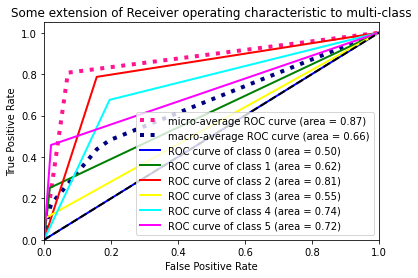

In [ ]:
from sklearn import metrics
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
lw = 2
n_classes = 6

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue','green','red','yellow','cyan','magenta'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw,
           label='ROC curve of class {0} (area = {1:0.2f})'
           ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
def predict_toxicity(comment):
    comment = clean_text(comment)
    sequences = tokenizer.texts_to_sequences([comment])
    pad_seq = pad_sequences(sequences, maxlen=maxlen)
    pred = model.predict_proba(pad_seq)
    return pred

import random
sample_text = random.choice(data[["comment_text","toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values.tolist())
prediction= predict_toxicity("He is so dumb and disgraceful")


# Print output
print("Toxicity levels for '{}':".format(sample_text[0]))
print('Toxic:         {:.0%}'.format(prediction[0][0]))
print('Severe Toxic:  {:.0%}'.format(prediction[0][1]))
print('Obscene:       {:.0%}'.format(prediction[0][2]))
print('Threat:        {:.0%}'.format(prediction[0][3]))
print('Insult:        {:.0%}'.format(prediction[0][4]))
print('Identity Hate: {:.0%}'.format(prediction[0][5]))
print()  



Toxicity levels for 'yes image dog lick ball come mind talk':
Toxic:         99%
Severe Toxic:  1%
Obscene:       15%
Threat:        0%
Insult:        61%
Identity Hate: 1%



In [ ]:
from keras.layers import Bidirectional,GRU,GlobalAveragePooling1D


In [ ]:
import keras.backend as K
def precision(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def recall(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def fbeta_score(y_true, y_pred, beta=1):
  if beta < 0:
    raise ValueError('The lowest choosable beta is zero (only precision).')

# If there are no true positives, fix the F score at 0 like sklearn.
  if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
    return 0

  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  bb = beta ** 2
  fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
  return fbeta_score

def fmeasure(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=1)

In [ ]:
model = Sequential()
model.add(Embedding(len(word_index)+1,embed_size,weights=[embedding_matrix], input_length=maxlen,trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(Dropout(0.3))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train, epochs = 5, batch_size=128, class_weight='balanced',validation_data=(X_test, y_test))

Train on 12978 samples, validate on 3245 samples
Epoch 1/5
12978/12978 [==============================] - 128s 10ms/step - loss: 0.2487 - val_loss: 0.2757
Epoch 2/5
12978/12978 [==============================] - 126s 10ms/step - loss: 0.2412 - val_loss: 0.2697
Epoch 3/5
12978/12978 [==============================] - 126s 10ms/step - loss: 0.2379 - val_loss: 0.2766
Epoch 4/5
12978/12978 [==============================] - 125s 10ms/step - loss: 0.2324 - val_loss: 0.2669
Epoch 5/5
12978/12978 [==============================] - 126s 10ms/step - loss: 0.2277 - val_loss: 0.2696


In [ ]:
model.save('BiLSTMCNN_toxic.h5')

In [ ]:
predictions=model.predict_proba(X_test)


In [ ]:
train_pred = model.predict_proba(X_train)

In [ ]:
loss = log_loss(y_test,predictions)
print("Log_loss : {}".format(loss))

Log_loss : 2.6327400536653807


In [ ]:
predictions = np.round(predictions)
train_pred = np.round(train_pred)

In [ ]:
h_loss = hamming_loss(y_test,predictions)
print("Hamming_loss : {}".format(h_loss*100))

Hamming_loss : 11.340523882896763


In [ ]:
precision = precision_score(y_test,predictions,average='micro')
print("Precision: {}".format(precision))
recall = recall_score(y_test,predictions,average='micro')
print("Recall : {}".format(recall))
f1_score = f1_score(y_test,predictions,average='micro')
print("F1-score : {}".format(f1_score))


Precision: 0.8434870902233826
Recall : 0.837413594470046
F1-score : 0.8404393698511345


In [ ]:
AUC=np.zeros((2,6))

for i,x in enumerate(classes):
  auc = np.array([metrics.roc_auc_score(y_train[:,i], train_pred[:,i]),
                  metrics.roc_auc_score(y_test[:,i], predictions[:,i])])
  print(x,"Train AUC:",auc[0],", Test AUC:",auc[1])
  AUC[:,i] = auc
    
avg_auc = AUC.mean(axis=1)
print("Average Train AUC:",avg_auc[0],", Average Test AUC:",avg_auc[1])

toxic Train AUC: 0.5027137042062415 , Test AUC: 0.5
severe_toxic Train AUC: 0.6354243946051856 , Test AUC: 0.6139269390841161
obscene Train AUC: 0.8954683392502145 , Test AUC: 0.8163715165712104
threat Train AUC: 0.7650365485460034 , Test AUC: 0.6930843584590355
insult Train AUC: 0.8152033525706932 , Test AUC: 0.7401928548268506
identity_hate Train AUC: 0.8379362878136987 , Test AUC: 0.7565058664938188
Average Train AUC: 0.7419637711653394 , Average Test AUC: 0.6866802559058386


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


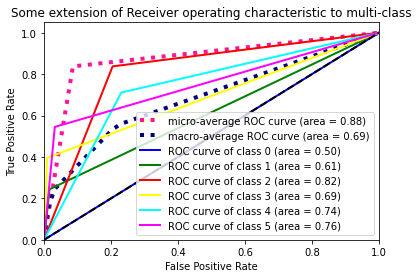

In [ ]:
from sklearn import metrics
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
lw = 2
n_classes = 6

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue','green','red','yellow','cyan','magenta'])
for i, color in zip(range(n_classes), colors):
  plt.plot(fpr[i], tpr[i], color=color, lw=lw,
           label='ROC curve of class {0} (area = {1:0.2f})'
           ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
def predict_toxicity(comment):
    sequences = tokenizer.texts_to_sequences([comment])
    pad_seq = pad_sequences(sequences, maxlen=maxlen)
    pred = model.predict_proba(pad_seq)
    return pred

import random
sample_text = random.choice(data[["comment_text","toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values.tolist())
prediction= predict_toxicity(sample_text[0])
pred = pd.DataFrame(prediction,index=["Probability"], columns=classes)
pred = pred.T
pred['label'] = np.round(pred['Probability'])
labels = pred[pred['label']==1].index.tolist()
probability = pred.loc[pred['label'] == 1, 'Probability']
probab = probability.rename_axis('Label').reset_index()
# Print output
print("Toxicity levels for '{}':".format(sample_text[0]))
print('Labels: {}'.format(' '.join([str(elem) for elem in labels])))
print('Probabiltiy : {}'.format(' '.join([str(elem) for elem in probability])))

print('Actual Labels {}'.format(sample_text[1:]))
print(probab)
probab['Label']



Toxicity levels for 'fuck loser get wikipedia stop douche bag fun asshole':
Labels: toxic obscene insult
Probabiltiy : 0.9996997117996216 0.992199718952179 0.9598944783210754
Actual Labels [1, 1, 1, 0, 1, 0]
     Label  Probability
0    toxic     0.999700
1  obscene     0.992200
2   insult     0.959894


0      toxic
1    obscene
2     insult
Name: Label, dtype: object